<a href="https://colab.research.google.com/github/Ankitatiwary21/Hackbtech/blob/main/FACEBOOK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pandas textblob
!python -m textblob.download_corpora


[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package conll2000 to /root/nltk_data...
[nltk_data]   Unzipping corpora/conll2000.zip.
[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Unzipping corpora/movie_reviews.zip.
Finished.


In [2]:
import pandas as pd
from textblob import TextBlob


In [3]:
from google.colab import files

# Upload the CSV file
uploaded = files.upload()


Saving fb.csv to fb (1).csv


In [4]:
# Load your dataset
comments_df = pd.read_csv('fb.csv')

# Display the first few rows of the DataFrame
comments_df.head()


,comment
0,I love this post! It's so inspiring!
1,This is the worst experience I've ever had.
2,Absolutely amazing! I can't get enough of this!
3,I'm not sure how I feel about this.
4,"This is just okay, nothing special."


In [5]:
def get_sentiment(comment):
    analysis = TextBlob(comment)
    return analysis.sentiment.polarity  # Range from -1 (negative) to 1 (positive)

# Apply the sentiment analysis function to the 'comment' column
comments_df['sentiment'] = comments_df['comment'].apply(get_sentiment)

# Classify sentiment as positive, negative, or neutral
def classify_sentiment(score):
    if score > 0:
        return 'Positive'
    elif score < 0:
        return 'Negative'
    else:
        return 'Neutral'

comments_df['sentiment_label'] = comments_df['sentiment'].apply(classify_sentiment)


                                            comment  sentiment sentiment_label
0              I love this post! It's so inspiring!   0.625000        Positive
1       This is the worst experience I've ever had.  -1.000000        Negative
2   Absolutely amazing! I can't get enough of this!   0.375000        Positive
3               I'm not sure how I feel about this.  -0.250000        Negative
4               This is just okay, nothing special.   0.428571        Positive
..                                              ...        ...             ...
95                    This is just plain fantastic!   0.142857        Positive
96          I’m unsure about the relevance of this.   0.000000         Neutral
97                         This is truly wonderful!   1.000000        Positive
98                         It wasn’t my cup of tea.   0.000000         Neutral
99           This resonates with me on many levels!   0.625000        Positive

[100 rows x 3 columns]


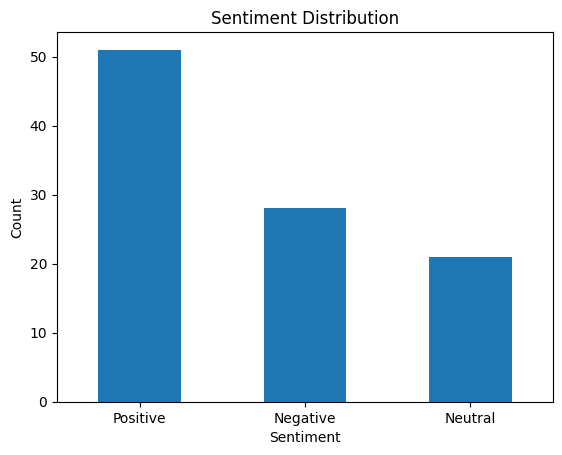

In [6]:
# Display the updated DataFrame with sentiments
print(comments_df[['comment', 'sentiment', 'sentiment_label']])

# Count the occurrences of each sentiment
sentiment_counts = comments_df['sentiment_label'].value_counts()

# Visualize the sentiment distribution
import matplotlib.pyplot as plt

sentiment_counts.plot(kind='bar', title='Sentiment Distribution', xlabel='Sentiment', ylabel='Count')
plt.xticks(rotation=0)  # Rotate x-axis labels for better visibility
plt.show()
